### *Alexis Adrian Carrillo Medina (316733780)*
---
# **Simulacion Estocastica**
## **Tarea 2**
---

#### **Ejercicio 5**:

Programe el algoritmo de aceptacion rechazo y uselo para simular variables aleatorias asociadas a un densidad de probabilidad <br>
$f(x)\propto f_k(x)=e^{-\frac{x^2}{2}}(0.5sin(8x)^2+2cos(2x)^2sin(4x)^2+0.5)$

---

En el PDF concluimos que<br>

$f(x) \propto f_k(x) \leq 3e^\frac{-x^2}{2}$

La cual es el kernel de una densidad $Normal(0,1)$ multiplicado por la constante $3$<br>
Entonces, programaremos aceptacion-rechazo apartir de la densidad $Normal(0,1)$

Por lo tanto, tenemos lo siguiente <br>

Sean $U \sim Uniform(0,1)$, $N \sim Normal(0,1)$, $f$ la densidad que queremos simular y $g$ la densidad de $N$ <br>
Aceptamos $N \sim \mathcal{L}(f)$ si<br>
$U \leq \frac{f(N)}{3g(N)}$

##### **Paquetes**

In [15]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import seaborn as sns

##### **Funciones auxiliares**

In [16]:
w= integrate.quad(lambda x: np.e**(-(x**2)/2)*(0.5*np.sin(8*x)**2+2*np.cos(2*x)**2*np.sin(4*x)**2+0.5), -np.inf,np.inf)

def f(x):
    return (np.e**(-(x**2)/2)*(0.5*np.sin(8*x)**2+2*np.cos(2*x)**2*np.sin(4*x)**2+0.5))/w[0]

def g(x):
    return(1/np.sqrt(2*np.pi))*np.e**(-(x**2)/2)

##### **Algoritmo**

In [17]:
def aceptacion_rechazo(U,N,f,g,M):
    if(U <= f(N)/(M*g(N))):
        return True
    else:
        return False

##### **Simulacion**

In [18]:
np.random.seed(0)

sample=1000
N = np.random.normal(0,1,sample)
U = np.random.uniform(0,1,sample)
x = np.linspace(-4,4,sample)
acceptedN=[]
nAcceptedN=[]
acceptedU=[]
nAcceptedU=[]

for i in range(sample):
    z=aceptacion_rechazo(U[i],N[i],f,g,3)
    if(z):
        acceptedN.append(N[i])
        acceptedU.append(U[i])
    else:
        nAcceptedN.append(N[i])
        nAcceptedU.append(U[i])
        
acceptedN=np.array(acceptedN)
nAcceptedN=np.array(nAcceptedN)
acceptedU=np.array(acceptedU)
nAcceptedU=np.array(nAcceptedU)

##### **Visualizacion**

*Visualizacion de la simulacion*

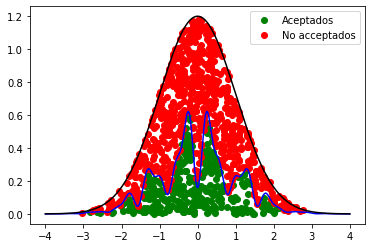

In [19]:
plt.plot(acceptedN,acceptedU*3*g(acceptedN),"o",c="green",label="Aceptados")
plt.plot(nAcceptedN,nAcceptedU*3*g(nAcceptedN),"o",c="red",label="No acceptados")
plt.plot(x,f(x),c="blue")
plt.plot(x,3*g(x),c='black')
plt.legend()
plt.show()

*Densidad de las variables simuladas*

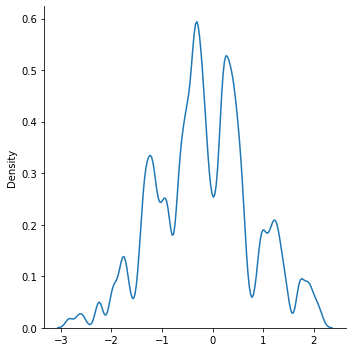

In [20]:
sns.displot(acceptedN,kind="kde",bw_adjust=.25)

*Densidad simulada vs Densidad teorica*

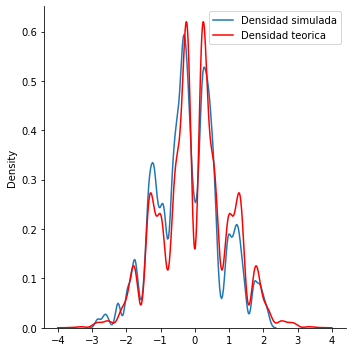

In [21]:
sns.color_palette("hls", 8)
sns.displot(acceptedN,kind="kde",bw_adjust=.25)
plt.plot(x,f(x),c="red")
plt.legend(labels=['Densidad simulada', 'Densidad teorica'])
plt.show()